## Loading Data and Preproccesing

In [26]:
import pandas as pd
import numpy as np

In [27]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [28]:
X, y = mnist["data"], mnist["target"]
X.shape, y.shape

((70000, 784), (70000,))

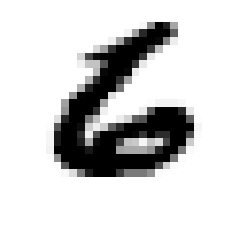

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = X[69999]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [29]:
y = y.astype(np.uint8)

In [30]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Non-Ensemble Models (SGDClassifier, GaussianNB)

In [31]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

In [32]:
from sklearn.naive_bayes import GaussianNB
gnb_clf = GaussianNB()

## Ensemble Voting Classifiers (Both Soft and Hard)

In [33]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
estimators=[('sgd', sgd_clf), ('gnb', gnb),],
voting='hard')

In [16]:
voting_clf2 = VotingClassifier(
estimators=[('lr', sgd_clf), ('rf', gnb),],
voting='soft')
voting_clf2.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              SGDClassifier(alpha=0.0001, average=False,
                                            class_weight=None,
                                            early_stopping=False, epsilon=0.1,
                                            eta0=0.0, fit_intercept=True,
                                            l1_ratio=0.15,
                                            learning_rate='optimal',
                                            loss='hinge', max_iter=1000,
                                            n_iter_no_change=5, n_jobs=None,
                                            penalty='l2', power_t=0.5,
                                            random_state=42, shuffle=True,
                                            tol=0.001, validation_fraction=0.1,
                                            verbose=0, warm_start=False)),
                             ('rf',
                              GaussianNB(priors=None, var_sm

## Bagging Classifier, Random Forests, and Extra Trees

In [34]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier()

In [42]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(
RandomForestClassifier(), n_estimators=10,
max_samples=10, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.098

In [40]:
from sklearn.ensemble import ExtraTreesClassifier
extr_clf = ExtraTreesClassifier(n_estimators=10, random_state=42)

## AdaBoost Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
DecisionTreeClassifier(max_depth=1), n_estimators=70,
algorithm="SAMME.R", learning_rate=0.5)

## XGBoost Classifier

In [21]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
for clf in (sgd_clf, gnb_clf,rnd_clf,ada_clf,xgb_clf,extr_clf,voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

SGDClassifier 0.874
GaussianNB 0.5558
RandomForestClassifier 0.9487
AdaBoostClassifier 0.7945
